In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [65]:
df_train=pd.read_excel(r"C:/Users/91836/Desktop/Curriculum and courses/Semesters/sem 7/Data Analytics Laboratory/A6/pulsar_data_train.xlsx", thousands=',')
df_test=pd.read_excel(r"C:/Users/91836/Desktop/Curriculum and courses/Semesters/sem 7/Data Analytics Laboratory/A6/pulsar_data_test.xlsx", thousands=',')

In [66]:
#df.columns=['buying', 'maintenance', 'doors', 'persons', 'lug_boot' , 'safety' , 'target']
df_train.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0


In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 881.0 KB


In [68]:
df_train.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [69]:
df_train['target_class'].value_counts()

0    11375
1     1153
Name: target_class, dtype: int64

<AxesSubplot:>

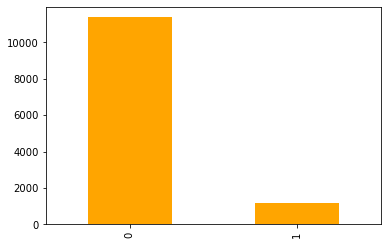

In [70]:
df_train['target_class'].value_counts().plot(kind='bar',color='orange')

In [71]:
df_train.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


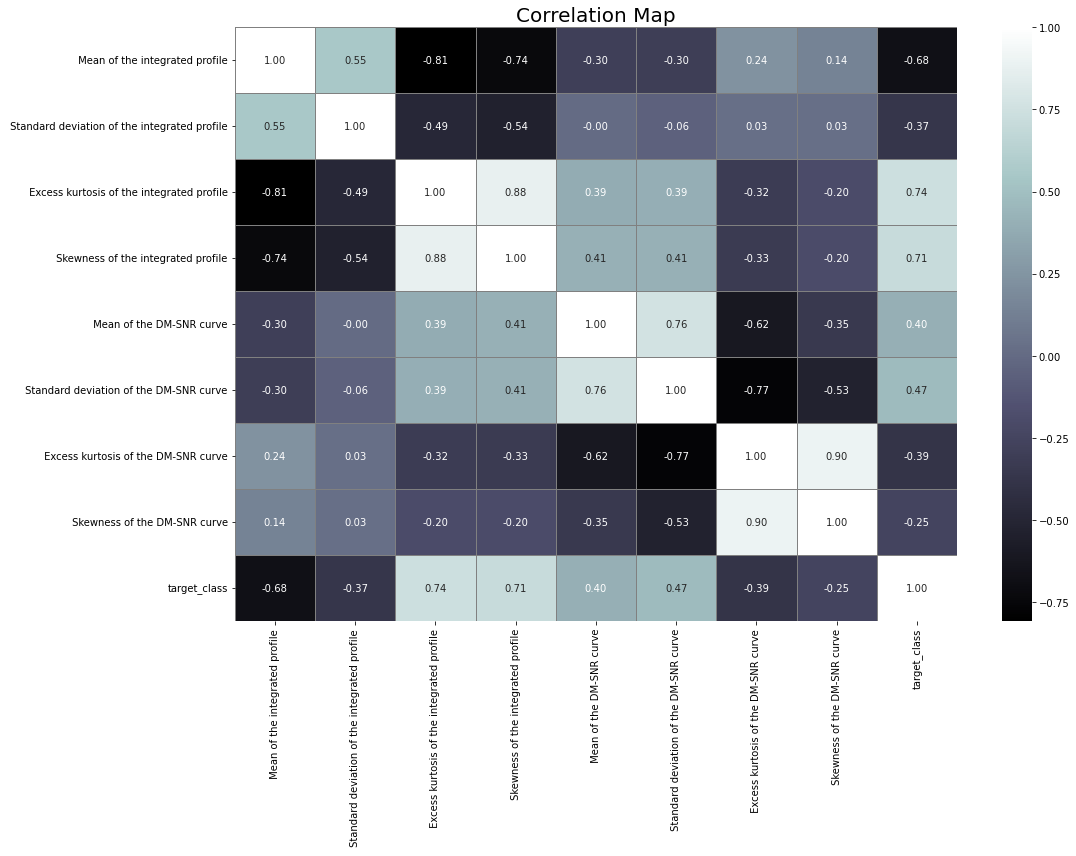

In [33]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_train.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()  

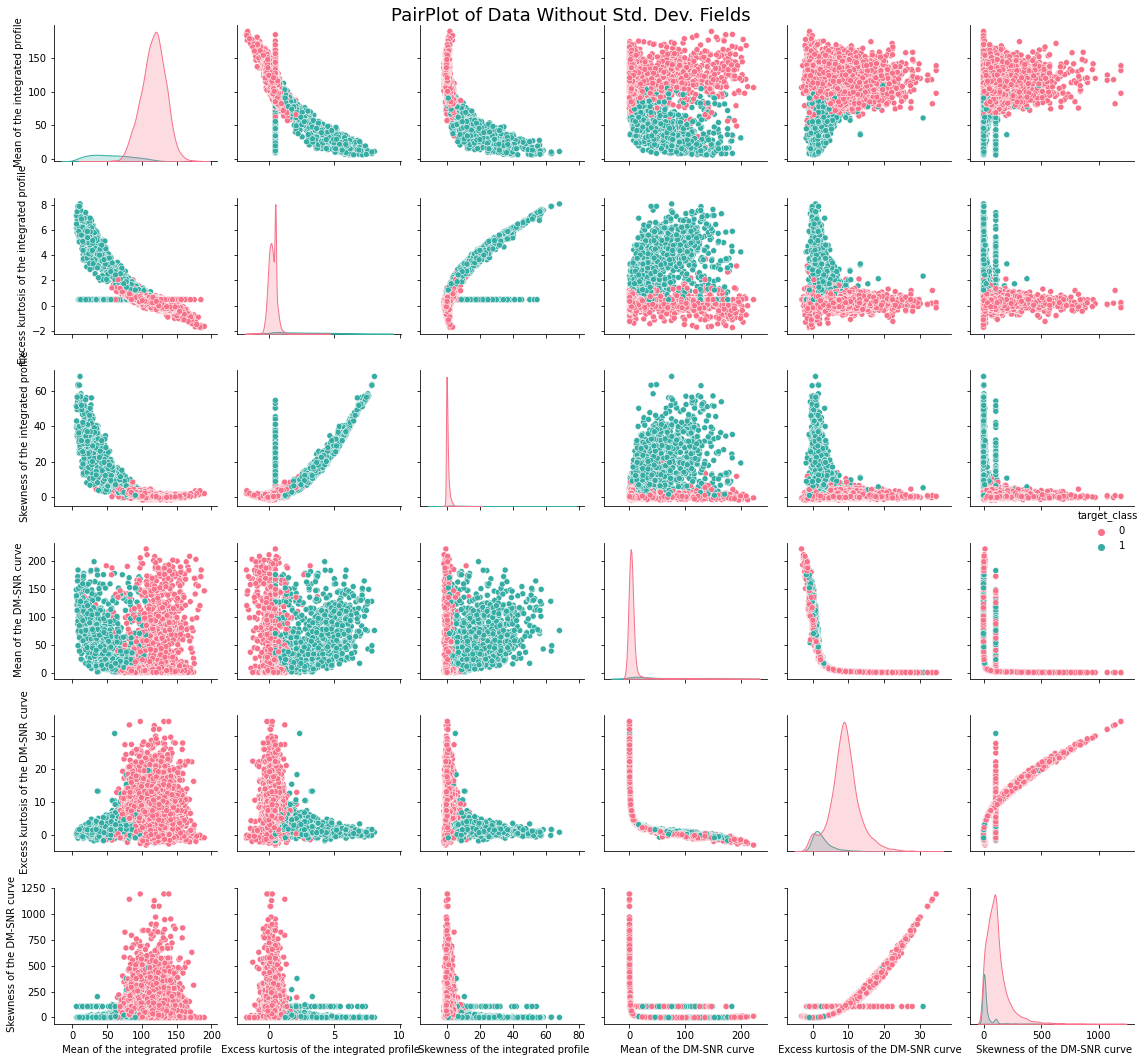

In [34]:
sns.pairplot(data=df_train,
             palette="husl",
             hue="target_class",
             vars=[" Mean of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve"])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='target_class', ylabel=' Standard deviation of the DM-SNR curve'>

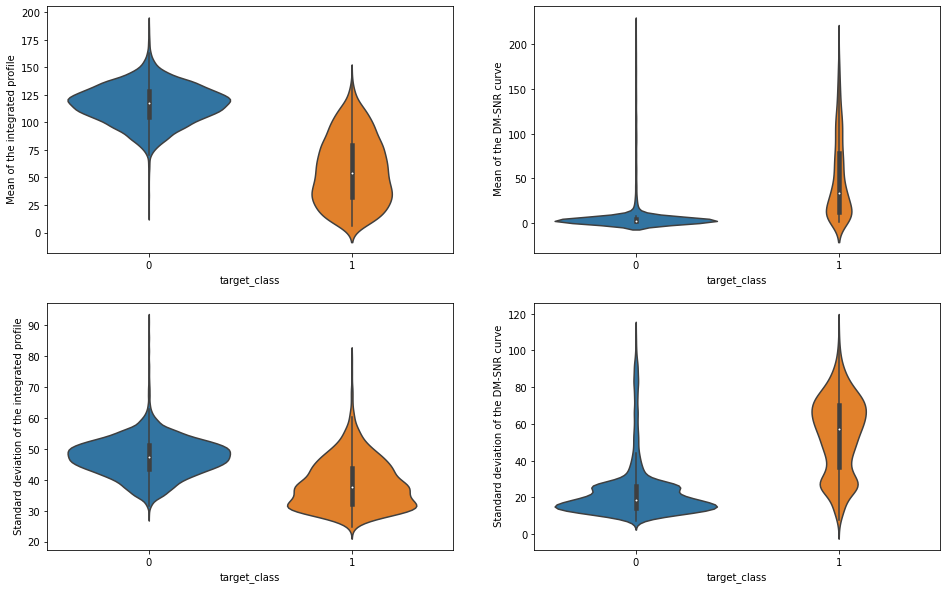

In [35]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.violinplot(data=df_train,y=" Mean of the integrated profile",x="target_class")

plt.subplot(2,2,2)
sns.violinplot(data=df_train,y=" Mean of the DM-SNR curve",x="target_class")

plt.subplot(2,2,3)
sns.violinplot(data=df_train,y=" Standard deviation of the integrated profile",x="target_class")

plt.subplot(2,2,4)
sns.violinplot(data=df_train,y=" Standard deviation of the DM-SNR curve",x="target_class")

In [81]:
df_train.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
dtype: int64

In [80]:
mean_value=df_train[' Standard deviation of the DM-SNR curve'].mean()
df_train[' Standard deviation of the DM-SNR curve'].fillna(value=mean_value, inplace=True)

In [76]:
labels_train = df_train.target_class.values
df_train.drop(["target_class"],axis=1,inplace=True)
features_train = df_train.values

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

features_scaled_train = scaler.fit_transform(features_train)

In [82]:
df_test.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile        767
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           524
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     244
target_class                                     5370
dtype: int64

In [87]:
mean_value=df_test[' Skewness of the DM-SNR curve'].mean()
df_test[' Skewness of the DM-SNR curve'].fillna(value=mean_value, inplace=True)

In [88]:
df_test.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile          0
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve             0
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                       0
target_class                                     5370
dtype: int64

In [89]:
labels_test = df_test.target_class.values
df_test.drop(["target_class"],axis=1,inplace=True)
features_test = df_test.values

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

features_scaled_test = scaler.fit_transform(features_test)

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_scaled_train,labels_train,test_size=0.2)

In [92]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42,C=250,gamma=1.6,kernel="poly",probability=True)

svm_model.fit(x_train,y_train)

y_head_svm = svm_model.predict(x_test)

svm_score = svm_model.score(x_test,y_test)

In [93]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42,solver="liblinear",C=1.6,penalty="l1")

lr_model.fit(x_train,y_train)

y_head_lr = lr_model.predict(x_test)

lr_score = lr_model.score(x_test,y_test)

In [94]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(random_state=42)

dc_model.fit(x_train,y_train)

y_head_dc = dc_model.predict(x_test)

dc_score = dc_model.score(x_test,y_test)

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=37,random_state=42,max_leaf_nodes=200,criterion="entropy")

rfc_model.fit(x_train,y_train)

y_head_rfc = rfc_model.predict(x_test)

rfc_score = rfc_model.score(x_test,y_test)

In [96]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(x_train,y_train)

y_head_nb = nb_model.predict(x_test)

nb_score = nb_model.score(x_test,y_test)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7,weights="distance")

knn_model.fit(x_train,y_train)

y_head_knn = knn_model.predict(x_test)

knn_score = knn_model.score(x_test,y_test)

In [98]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dc = confusion_matrix(y_test,y_head_dc)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_rfc = confusion_matrix(y_test,y_head_rfc)
cm_svm = confusion_matrix(y_test,y_head_svm)

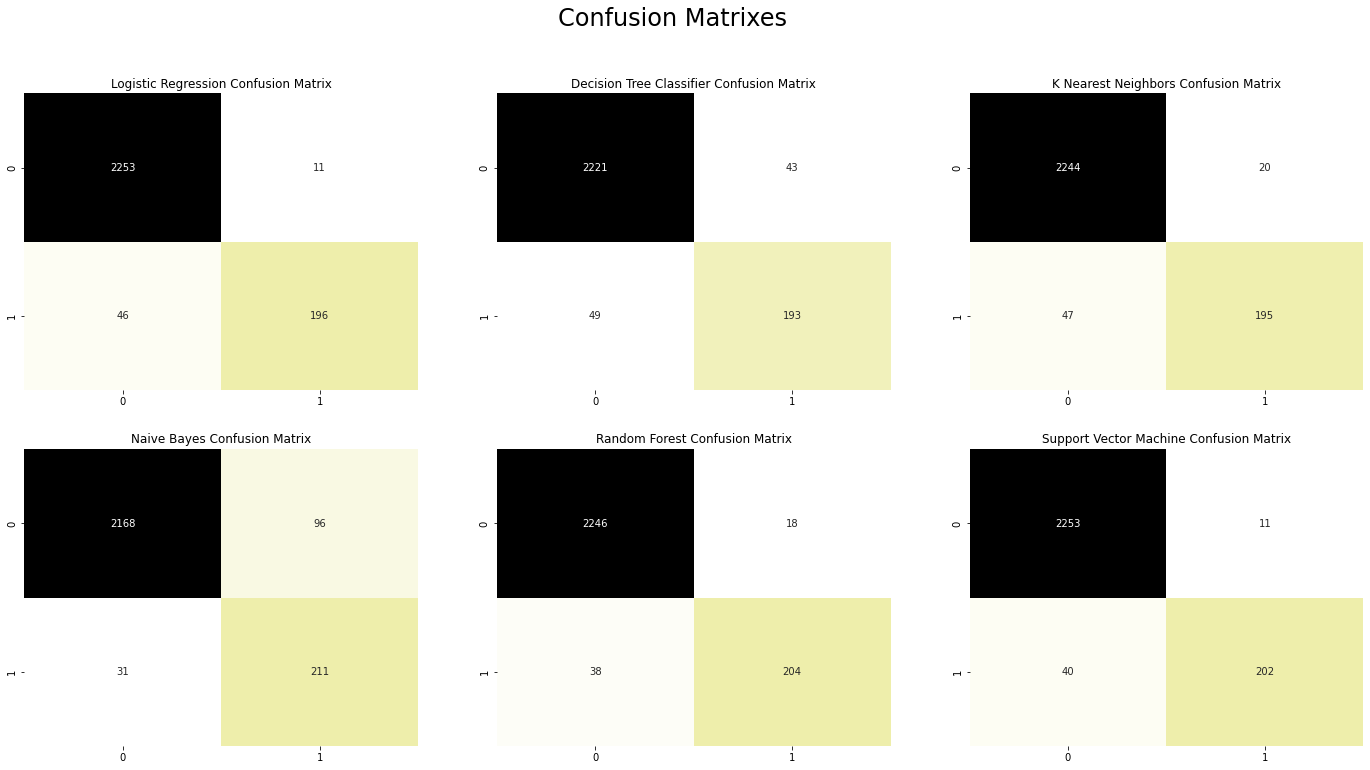

In [99]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dc,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rfc,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.subplot(2,3,6)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")

plt.show()


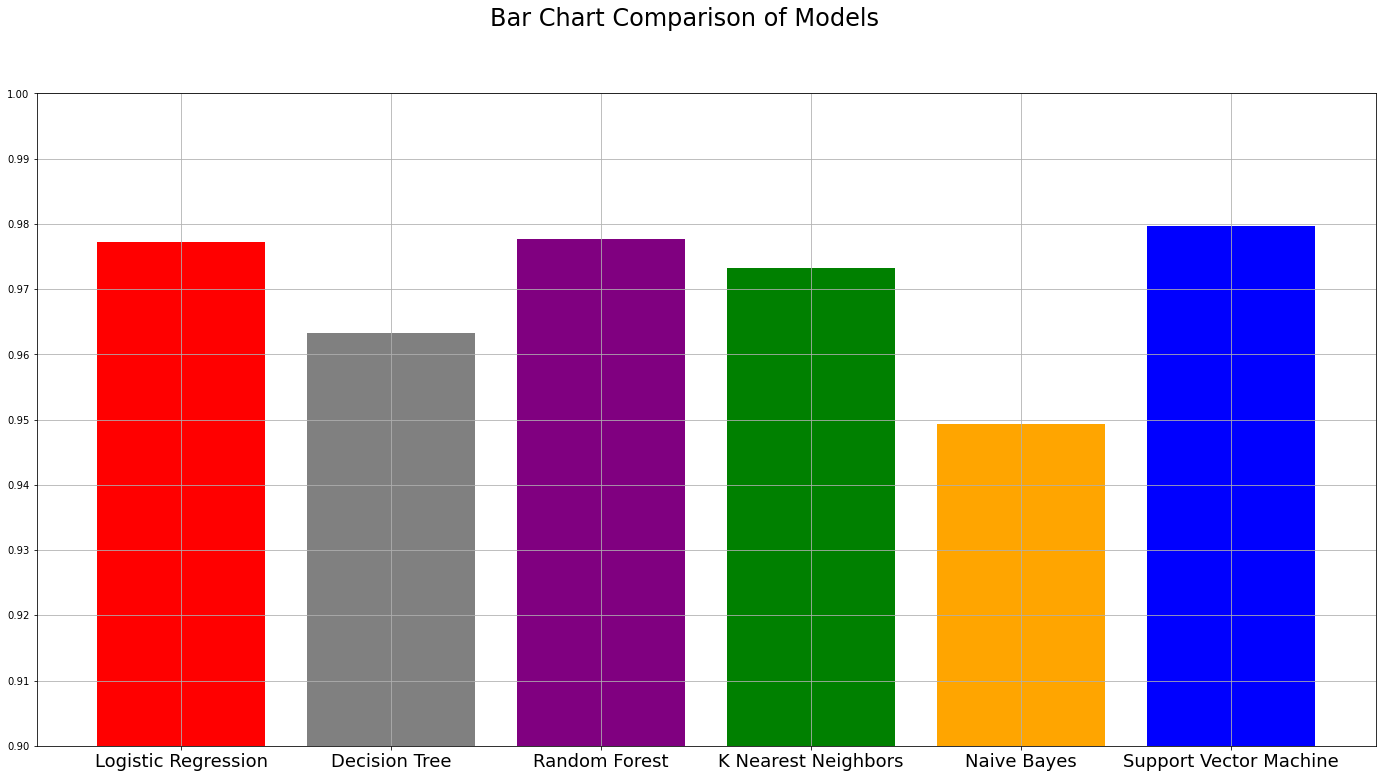

In [100]:
algorithms = ("Logistic Regression","Decision Tree","Random Forest","K Nearest Neighbors","Naive Bayes","Support Vector Machine")
scores = (lr_score,dc_score,rfc_score,knn_score,nb_score,svm_score)
y_pos = np.arange(1,7)
colors = ("red","gray","purple","green","orange","blue")

plt.figure(figsize=(24,12))
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.01))
plt.ylim(0.90,1.00)
plt.bar(y_pos,scores,color=colors)
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=24)
plt.show()